In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import norm

# Import Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('ds_salaries.csv')

In [13]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


## Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
data.shape

(3755, 11)

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [15]:
for column in data.columns:
    unique_values = len(data[column].unique())
    print(f"{column} : {unique_values} unique values")

work_year : 4 unique values
experience_level : 4 unique values
employment_type : 4 unique values
job_title : 93 unique values
salary : 815 unique values
salary_currency : 20 unique values
salary_in_usd : 1035 unique values
employee_residence : 78 unique values
remote_ratio : 3 unique values
company_location : 72 unique values
company_size : 3 unique values


## EDA

In [16]:
#약어로 되어있는 카테고리 변수들 알아보기 쉽게 풀어서 값 대체하기

In [17]:
data['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [18]:
data['experience_level'] = data['experience_level'].replace('SE', 'Senior level')
data['experience_level'] = data['experience_level'].replace('MI', 'Intermediate level')
data['experience_level'] = data['experience_level'].replace('EN', 'Entry level')
data['experience_level'] = data['experience_level'].replace('EX', 'Executive level')

In [19]:
data['experience_level'].unique()

array(['Senior level', 'Intermediate level', 'Entry level',
       'Executive level'], dtype=object)

In [20]:
data['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [21]:
data['employment_type'] = data['employment_type'].replace('FT', 'Full Time')
data['employment_type'] = data['employment_type'].replace('CT', 'Contract')
data['employment_type'] = data['employment_type'].replace('FL', 'Freelance')
data['employment_type'] = data['employment_type'].replace('PT', 'Part Time')

In [22]:
data['employment_type'].unique()

array(['Full Time', 'Contract', 'Freelance', 'Part Time'], dtype=object)

In [23]:
jobs = data['job_title'].value_counts()
jobs

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [24]:
top_jobs = jobs[:15] #개수가 많은 top15개 직군 조사
top_jobs

Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Computer Vision Engineer        18
Name: job_title, dtype: int64

In [25]:
job_title = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 
             'Analytics Engineer', 'Data Architect', 'Research Scientist', 'Data Science Manager',
             'Applied Scientist', 'Research Engineer', 'ML Engineer', 'Data Manager', 'Machine Learning Scientist',
             'Data Science Consultant', 'Data Analytics Manager', 'Computer Vision Engineer']
counts = np.array(top_jobs)

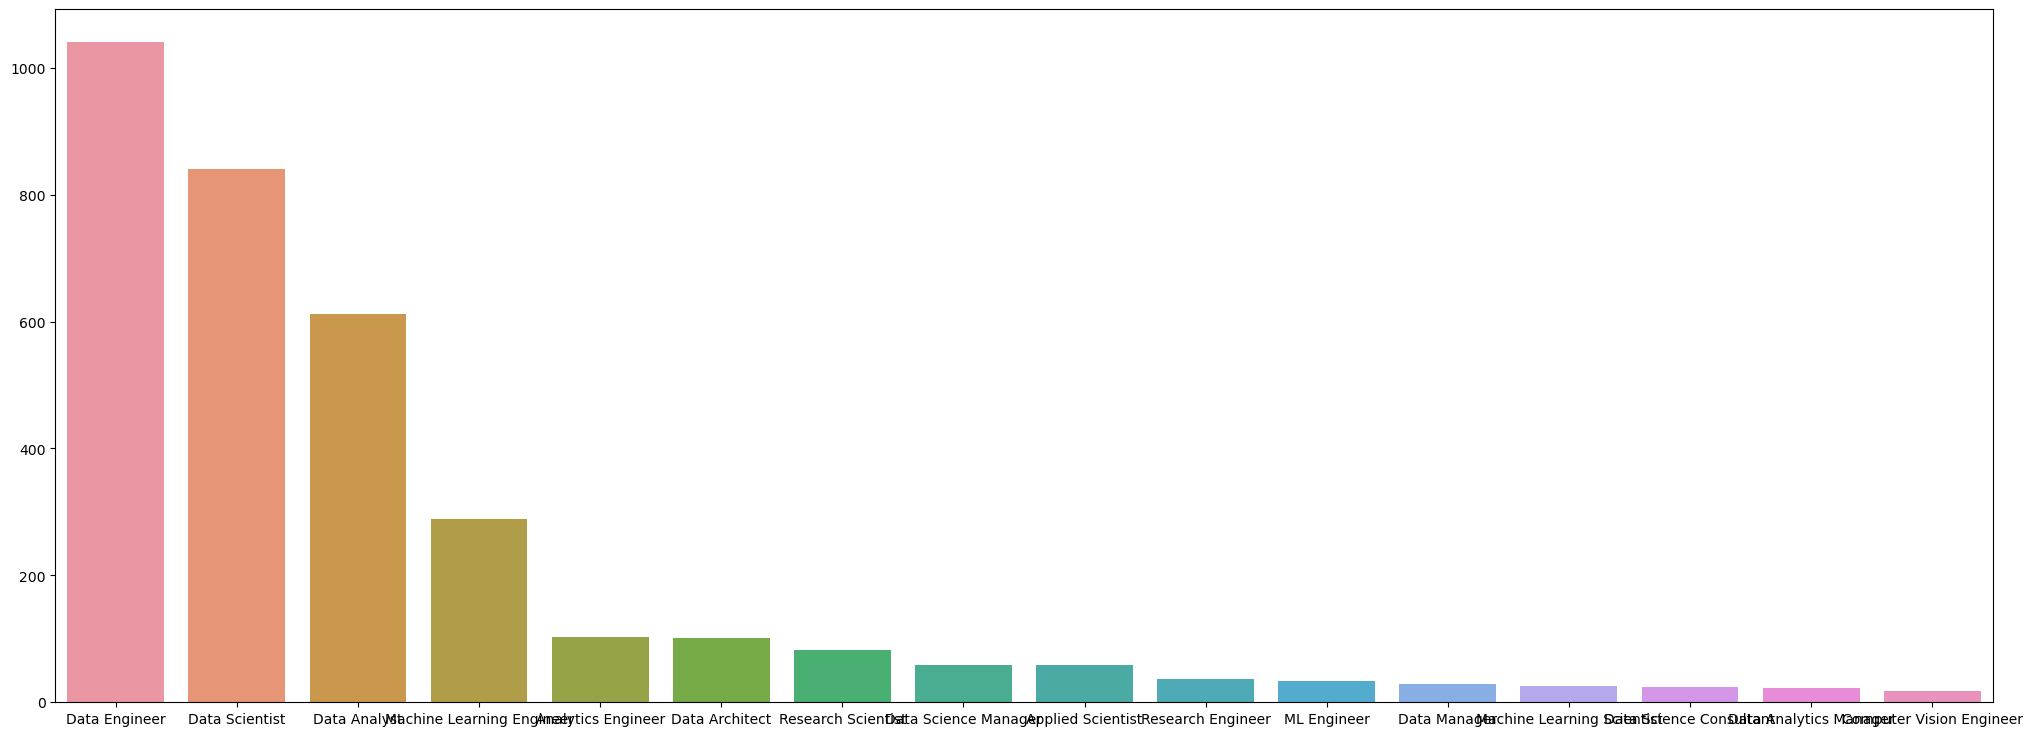

In [26]:
plt.figure(figsize=(25,9))
sns.barplot(x=job_title, y=counts)
# plt.xticks(rotation=45)
plt.show()

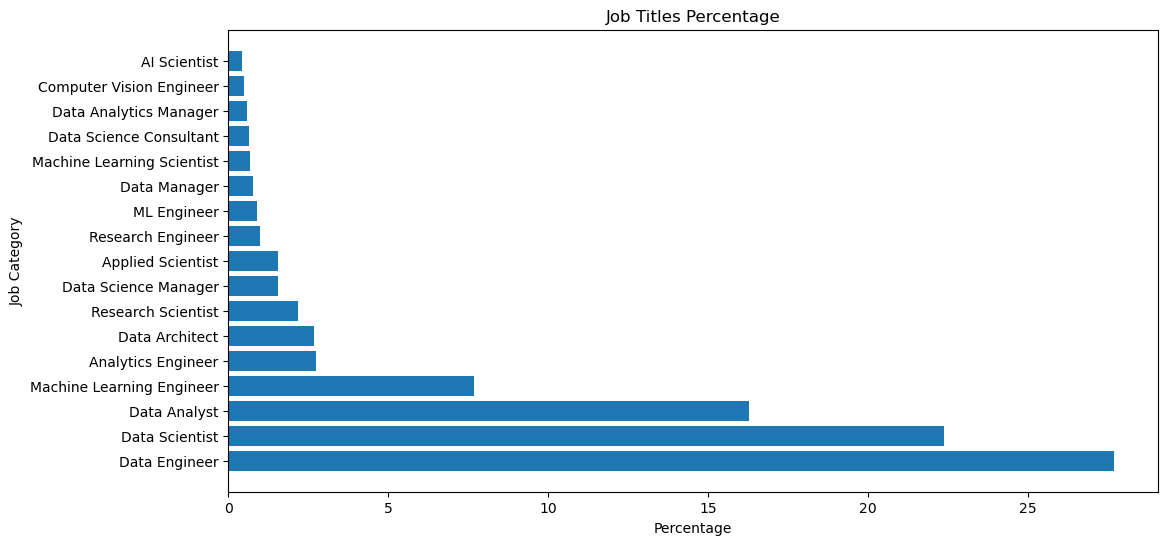

In [81]:
# 분포도를 퍼센트로 따졌을 때

value_counts = data['job_title'].value_counts(normalize=True) * 100
# noramlize = True : 각 직무 제목의 등장 빈도를 전체 데이터에서 해당 직무 제목의 등장 비율로 변환
# -> 백분율로 표현하기 위해 100 곱하기

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

In [54]:
# Salaries based on Job Title

jobs = data['salary_in_usd'].groupby(data['job_title']).mean().sort_values(ascending=False)

In [47]:
#상위 20개 추출
top20 = jobs.nlargest(20)
top20

job_title
Data Science Tech Lead                 375000.000000
Cloud Data Architect                   250000.000000
Data Lead                              212500.000000
Data Analytics Lead                    211254.500000
Principal Data Scientist               198171.125000
Director of Data Science               195140.727273
Principal Data Engineer                192500.000000
Machine Learning Software Engineer     192420.000000
Data Science Manager                   191278.775862
Applied Scientist                      190264.482759
Principal Machine Learning Engineer    190000.000000
Head of Data                           183857.500000
Data Infrastructure Engineer           175051.666667
Business Intelligence Engineer         174150.000000
Machine Learning Scientist             163220.076923
Research Engineer                      163108.378378
Data Architect                         161713.772277
Research Scientist                     161214.195122
Head of Data Science                

In [49]:
top20_jobs = ['Data Science Tech Lead',
'Cloud Data Architect',
'Data Lead',
'Data Analytics Lead',
'Principal Data Scientist',
'Director of Data Science',
'Principal Data Engineer',
'Machine Learning Software Engineer', 
'Data Science Manager',
'Applied Scientist', 
'Principal Machine Learning Engineer', 
'Head of Data', 
'Data Infrastructure Engineer', 
'Business Intelligence Engineer', 
'Machine Learning Scientist', 
'Research Engineer', 
'Data Architect',
'Research Scientist', 
'Head of Data Science',
'ML Engineer']

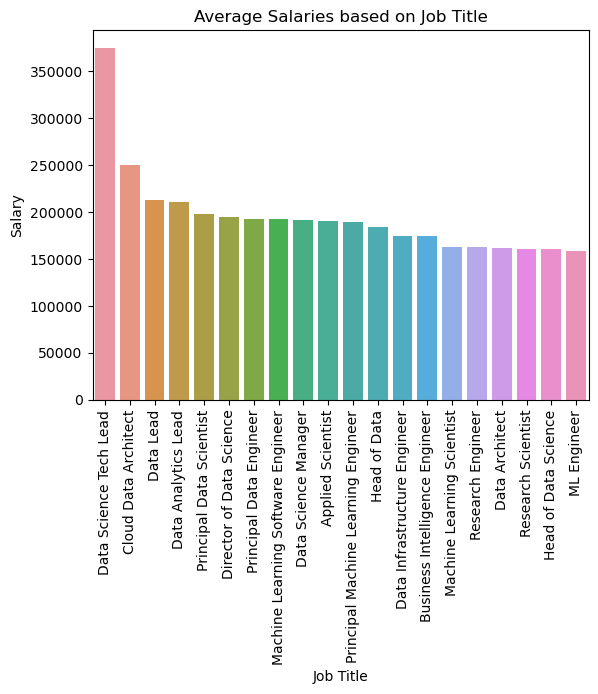

In [51]:
plt.title("Average Salaries based on Job Title")
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=90)
sns.barplot(x=top20_jobs, y=np.array(top20))
plt.show()

In [65]:
# Salaries based on Experiance Level

data['salary_in_usd'].groupby(data['experience_level']).mean().sort_values(ascending=False)

experience_level
Executive level       194930.929825
Senior level          153051.071542
Intermediate level    104525.939130
Entry level            78546.284375
Name: salary_in_usd, dtype: float64

In [66]:
ex_salary = np.array(data['salary_in_usd'].groupby(data['experience_level']).mean().sort_values(ascending=False))

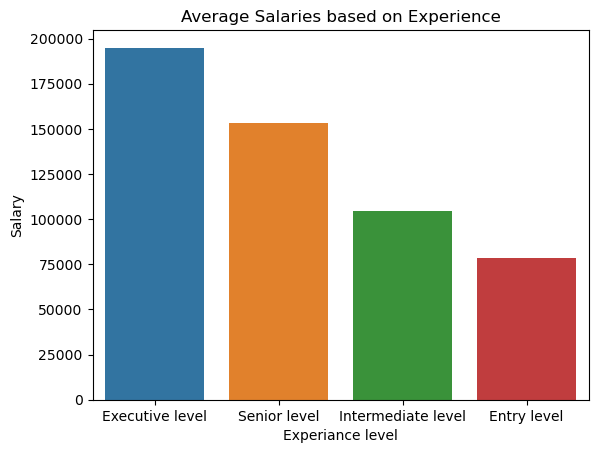

In [67]:
plt.title("Average Salaries based on Experience")
plt.xlabel('Experiance level')
plt.ylabel('Salary')
sns.barplot(x=['Executive level', 'Senior level', 'Intermediate level', 'Entry level'],y=ex_salary)
plt.show()

In [64]:
# Salaries based on Employment Type

data['salary_in_usd'].groupby(data['employment_type']).mean().sort_values(ascending=False)

employment_type
Full Time    138314.199570
Contract     113446.900000
Freelance     51807.800000
Part Time     39533.705882
Name: salary_in_usd, dtype: float64

In [68]:
emp_salary = np.array(data['salary_in_usd'].groupby(data['employment_type']).mean().sort_values(ascending=False))

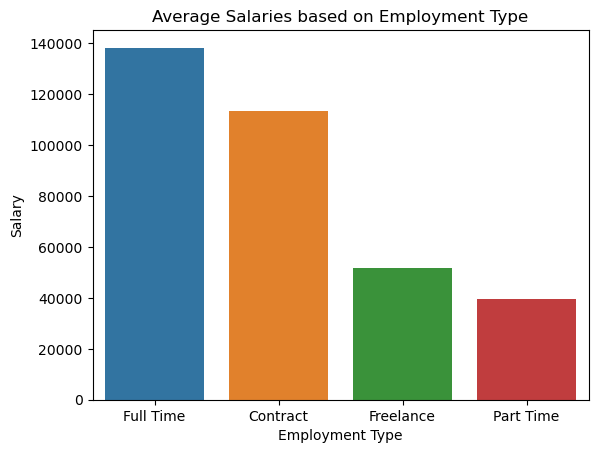

In [69]:
plt.title("Average Salaries based on Employment Type")
plt.xlabel('Employment Type')
plt.ylabel('Salary')
sns.barplot(x=['Full Time', 'Contract', 'Freelance', 'Part Time'],y=emp_salary)
plt.show()

In [70]:
# Salaries based on Remote ratio

data['salary_in_usd'].groupby(data['remote_ratio']).mean().sort_values(ascending=False)

remote_ratio
0      144316.202288
100    136481.452830
50      78400.687831
Name: salary_in_usd, dtype: float64

In [71]:
rr_salary = np.array(data['salary_in_usd'].groupby(data['remote_ratio']).mean().sort_values(ascending=False))

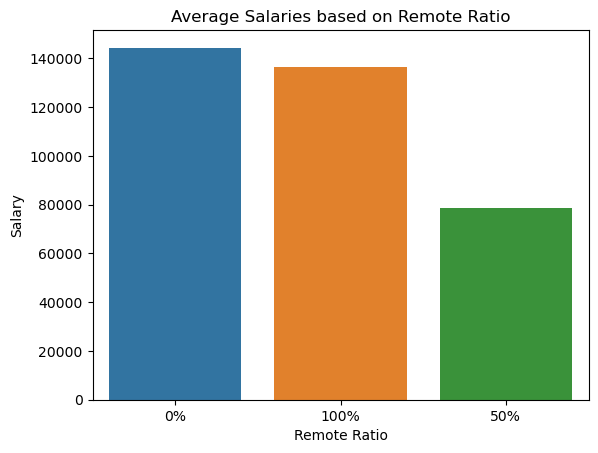

In [72]:
plt.title("Average Salaries based on Remote Ratio")
plt.xlabel('Remote Ratio')
plt.ylabel('Salary')
sns.barplot(x=['0%', '100%', '50%'],y=rr_salary)
plt.show()

In [73]:
# Salaries based on Company Size

data['salary_in_usd'].groupby(data['company_size']).mean().sort_values(ascending=False)

company_size
M    143130.548367
L    118300.982379
S     78226.682432
Name: salary_in_usd, dtype: float64

In [74]:
cs_salary = np.array(data['salary_in_usd'].groupby(data['company_size']).mean().sort_values(ascending=False))

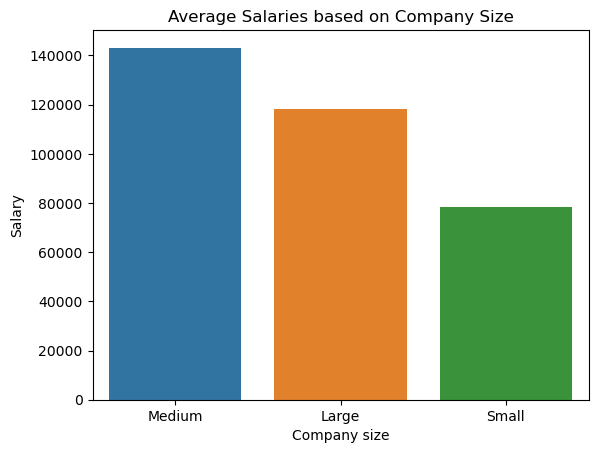

In [76]:
plt.title("Average Salaries based on Company Size")
plt.xlabel('Company size')
plt.ylabel('Salary')
sns.barplot(x=['Medium', 'Large', 'Small'],y=cs_salary)
plt.show()

In [77]:
# Salary based on Work Years

data['salary_in_usd'].groupby(data['work_year']).mean()

work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64

In [78]:
wy_salary=np.array(data['salary_in_usd'].groupby(data['work_year']) .mean())

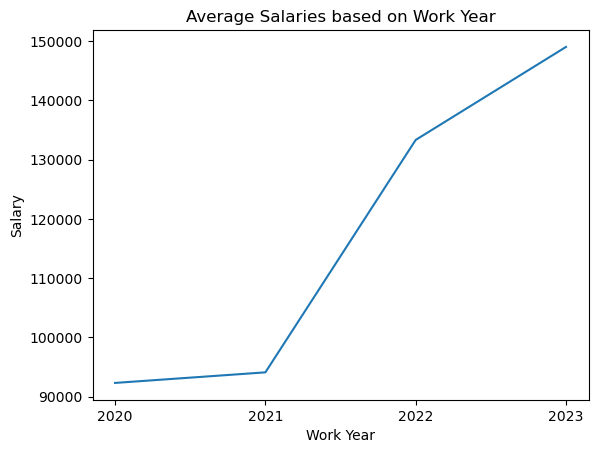

In [79]:
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=wy_salary)
plt.show()

## 전처리 & Modeling

In [84]:
# LabelEncoder로 카테고리 변수 변환
cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
data[cols]=data[cols].apply(LabelEncoder().fit_transform)

# X, y
X = data.drop(["salary_in_usd"], axis=1)
y = data["salary_in_usd"]

# train and test sets 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
data.head(10)
# 모든 카테고리 변수들이 1,2,3 등의 숫자로 표현되고 있음을 알 수 있다

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1
5,2023,3,2,8,222200,19,222200,75,0,70,0
6,2023,3,2,8,136000,19,136000,75,0,70,0
7,2023,3,2,47,219000,19,219000,11,0,12,1
8,2023,3,2,47,141000,19,141000,11,0,12,1
9,2023,3,2,47,147100,19,147100,75,0,70,1


In [93]:
# 사용할 모델
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]
#regression가 더 적합하다

# Model training, evaluation, and selection
best_model = None #최고 성능 저장하기 위한 변수
best_score = -np.inf #가장 높은 정확도를 저장하기 위한 변수, 초기값은 음의 무한대

print("Model performance:")
for name, model in models:
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)]) #데이터 전처리 - 데이터를 평균 0, 분산 1로 스케일링
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) #예측값과 실제값을 비교하여 정확도를 계산
    
    print(f"{name} - Accuracy: {accuracy:.2f}")
    
    if accuracy > best_score:
        best_score = accuracy
        best_model = pipeline
    #각 모델의 정확도를 비교하여 가장 높은 정확도를 가진 모델을 best_model로 선택

print(f"Best model: {best_model.named_steps['model']} with accuracy: {best_score:.2f}")

Model performance:
Logistic Regression - Accuracy: 0.04
Random Forest - Accuracy: 0.52
Gradient Boosting - Accuracy: 0.00
Best model: RandomForestClassifier() with accuracy: 0.52


In [ ]:
# Random Forest를 사용하였을 때 가장 높은 정확도를 보였다 (0.52)